In [3]:
import numpy as np
import matplotlib.pyplot as plt

What we want to do here is to sample from a Gaussian probability distribution with MCMC. Of course there are better methods to sample from a Gaussian, but you can imagine any other more complicated and higher-dimensional distribution, and the code needs virtually no change.

In [2]:
def Gaussian(x, mean, variance):
    return np.exp(-(x-mean)**2/(2*variance))/np.sqrt(2*np.pi*variance)

In [34]:
# n_therm = number of thermalization steps
# n_samp = number of samples
# n_skip = how many iterations to skip between two samples
# mu, sigma = parameters of the target distribution
def mcmc_gaussian(n_therm, n_samp, n_skip, scale, mu, sigma):
    # initialize x
    x = 0

    # function to perform a single move
    def move(dx):
        # propose a move x -> x_prime
        x_prime = x+dx

        # calculate acceptance prob
        p = Gaussian(x_prime, mu, sigma)/Gaussian(x, mu, sigma)

        # return 1 for accepted, 0 for rejected
        r = np.random.rand()
        return p>r


    # thermalization, all these iteration are going to be
    # thrown away because the chain is not properly thermalized
    for i in range(n_therm):
        dx = scale*(2*np.random.rand()-1)
        if move(dx):
            x += dx
        
    # do the actual sampling. the procedure is identical to
    # thermalization, but now we will save a total of `n_samp`
    # samples every `n_skip` itrations
    acc_rate = 0
    samples = []
    for i in range(n_samp):
        for j in range(n_skip):
            dx = scale*(2*np.random.rand()-1)
            if move(dx):
                x += dx
                acc_rate += 1
        # every `n_skip` iterations, save a sample
        samples.append(x)
    return (samples, acc_rate/(n_samp*n_skip)) 

In [112]:
# let's sample from a Gaussian with mean -3 and variance 15
samples, acc_rate = mcmc_gaussian(10000, 10000, 10, 10, -3, 15)
print(acc_rate)

0.54645


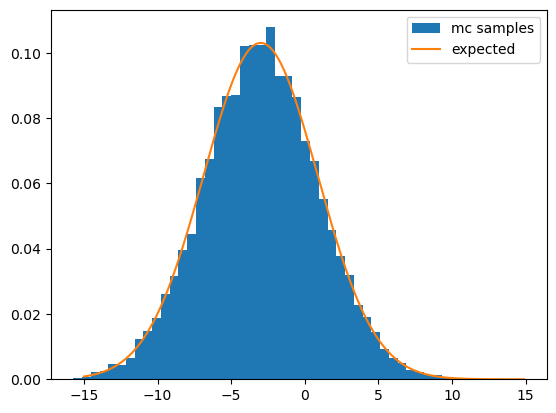

In [113]:
x_list = np.arange(-15, 15, 0.1)
plt.hist(samples, bins=50, density=True, label='mc samples')
plt.plot(x_list, Gaussian(x_list, mean, variance), label='expected')
plt.legend()
plt.show()

Now let's generalize to any other one-dimensional distribution

In [107]:
# Generalizing to any other one-dimensional distribution only requires
# to change the accepance probability ratio from gauss(x')/gauss(x)
# to dist(x')/dist(x), where dist is the target distribution
def mcmc_general(n_therm, n_samp, n_skip, scale, target, parameters):
    # initialize x
    x = 0

    # function to perform a single move
    def move(dx):
        # propose a move x -> x_prime
        x_prime = x+dx

        # calculate acceptance prob
        p = target(x_prime, parameters)/target(x, parameters)

        # return 1 for accepted, 0 for rejected
        r = np.random.rand()
        return p>r


    # thermalization, all these iteration are going to be
    # thrown away because the chain is not properly thermalized
    for i in range(n_therm):
        dx = scale*(2*np.random.rand()-1)
        if move(dx):
            x += dx
        
    # do the actual sampling. the procedure is identical to
    # thermalization, but now we will save a total of `n_samp`
    # samples every `n_skip` itrations
    acc_rate = 0
    samples = []
    for i in range(n_samp):
        for j in range(n_skip):
            dx = scale*(2*np.random.rand()-1)
            if move(dx):
                x += dx
                acc_rate += 1
        # every `n_skip` iterations, save a sample
        samples.append(x)
    return (samples, acc_rate/(n_samp*n_skip)) 

In [153]:
# as an example, let's take as a target distribution a sum of many normalized gaussians

def complicated_dist(x, params):
    # params[0] is the number of gaussians
    # params[i][0] with i>0 is the mean of the i-th gaussian
    # params[i][1] with i>0 is the variance of the i-th gaussian
    res = 0
    for i in range(1, params[0]+1):
        res += Gaussian(x, params[i][0], params[i][1])
    return res/params[0]

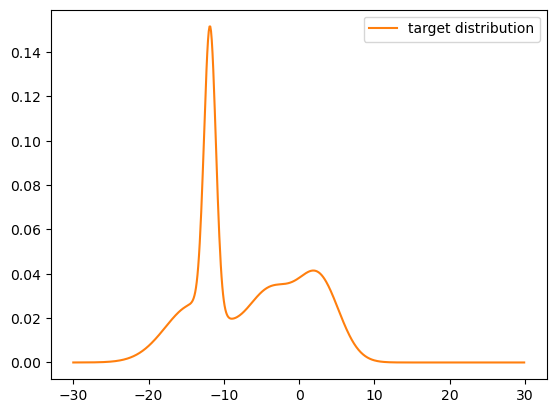

In [189]:
# target distribution
N = 4
means = 40*np.random.rand(N)-20
variances = 20*np.random.rand(N)
params = [N]
for i in range(N):
    params.append((means[i], variances[i]))

# plot
x_list = np.arange(-30, 30, 0.1)
plt.plot(x_list, complicated_dist(x_list, params), label='target distribution', c='tab:orange')
plt.legend()
plt.show()

In [190]:
print(means)
print(variances)

[ -3.83002818 -11.83910225   2.63207056 -13.95846608]
[10.08999988  0.6063507   7.42568053 14.53662549]


In [191]:
samples, acc_rate = mcmc_general(100000, 10000, 10, 10, complicated_dist, params)
print(acc_rate)

0.60198


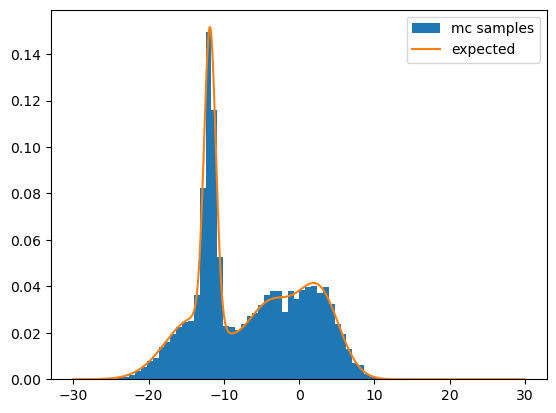

In [192]:
x_list = np.arange(-30, 30, 0.1)
plt.hist(samples, bins=50, density=True, label='mc samples')
plt.plot(x_list, complicated_dist(x_list, params), label='expected')
plt.legend()
plt.show()